In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from tableone import TableOne
from scipy.stats import normaltest
import scipy

# Data loading

In [2]:
eddc_order = pd.read_excel(open('/Users/fan/Desktop/Fullhouse/WCM/HospitalManagement/Data/EDDC_order_2012_2018_cluster_MED.xlsx', 'rb'), sheet_name='EDDC_order_2012_2018_cluster', header=0, index_col=None)

/anaconda3/lib/python3.7/site-packages/defusedxml/ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
/anaconda3/lib/python3.7/site-packages/defusedxml/ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
/anaconda3/lib/python3.7/site-packages/defusedxml/ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
/anaconda3/lib/python3.7/site-packages/defusedxml/ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
/anaconda3/lib/python3.7/site-packages/defusedxml/ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
/anaconda3/lib/python3.7/site-packages/defusedxml/ElementTre

In [3]:
eddc_order.head()

,clientvisitguid,LOS,30day,60day,90ay,charlson,elixhauser,userQ,dischargedisposition,home,...,marital,language_raw,language,ethnicity_raw,ethnicity,race_raw,race,death,insurance,payor
0,9000556943700270,8,0,0,0,1,1,medium,ROUTINE/HOME,1,...,Married,Spanish,Non-English,H,H,OtherNotDescribed,Other,0,MCRFFS,Medicare
1,9000561002000270,5,0,0,0,0,1,low,PATIENTEXPIRED,0,...,Married,English,English,N,N,OtherNotDescribed,Other,1,MCRFFS,Medicare
2,9000562000000270,9,0,0,0,2,3,medium,ROUTINE/HOME,1,...,NotMarried,English,English,N,N,OtherNotDescribed,Other,0,MCRFFS,Medicare
3,9000567313100270,52,0,0,0,1,5,medium,DISCHARGETOSNF,0,...,Married,German,Non-English,N,N,OtherNotDescribed,Other,0,MCRFFS,Medicare
4,9000579333200270,21,0,0,0,3,4,medium,DISCHARGEHOMEWITHHMHLTHSERV,0,...,NotMarried,English,English,D,unknown,Declined,Unknown,0,MCRFFS,Medicare


In [4]:
eddc_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 27 columns):
clientvisitguid         1473 non-null int64
LOS                     1473 non-null int64
30day                   1473 non-null int64
60day                   1473 non-null int64
90ay                    1473 non-null int64
charlson                1473 non-null int64
elixhauser              1473 non-null int64
userQ                   1473 non-null object
dischargedisposition    1468 non-null object
home                    1473 non-null int64
campus                  1473 non-null object
Eddecision              1229 non-null object
Edcampus                1229 non-null object
cluster_by30%           1473 non-null int64
VTE                     1473 non-null int64
CCW                     1473 non-null int64
gender                  1473 non-null object
marital                 1473 non-null object
language_raw            1473 non-null object
language                1473 non-null object
ethn

In [5]:
eddc_order_cols = list(eddc_order)

In [6]:
eddc_order.columns

Index(['clientvisitguid', 'LOS', '30day', '60day', '90ay', 'charlson',
       'elixhauser', 'userQ', 'dischargedisposition', 'home', 'campus',
       'Eddecision', 'Edcampus', 'cluster_by30%', 'VTE', 'CCW', 'gender',
       'marital', 'language_raw', 'language', 'ethnicity_raw', 'ethnicity',
       'race_raw', 'race', 'death', 'insurance', 'payor'],
      dtype='object')

In [7]:
eddc_order.describe()

,clientvisitguid,LOS,30day,60day,90ay,charlson,elixhauser,home,cluster_by30%,VTE,CCW,death
count,1.473000e+03,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.00000
mean,9.001025e+15,11.252546,0.023082,0.041412,0.060421,1.933469,3.331976,0.365241,2.200950,0.030550,1.649695,0.04888
std,1.462923e+11,19.280750,0.150215,0.199309,0.238346,0.977839,1.674348,0.481661,1.054403,0.172153,1.230622,0.21569
min,9.000557e+15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
25%,9.000906e+15,4.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.00000
50%,9.001023e+15,7.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,2.000000,0.000000,2.000000,0.00000
75%,9.001147e+15,13.000000,0.000000,0.000000,0.000000,2.000000,4.000000,1.000000,3.000000,0.000000,2.000000,0.00000
max,9.001285e+15,490.000000,1.000000,1.000000,1.000000,8.000000,10.000000,1.000000,4.000000,1.000000,6.000000,1.00000


In [8]:
n = eddc_order['clientvisitguid'].count()
n

1473

In [9]:
eddc_order['clientvisitguid'].nunique()

1473

# Exploratory data analysis

Text(0, 0.5, 'Frequency')

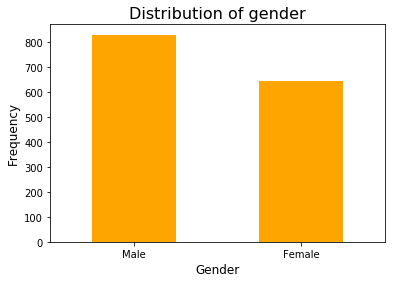

In [10]:
eddc_order['gender'].value_counts().plot(kind='bar', color='orange', rot=0)
plt.title('Distribution of gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

Text(0, 0.5, 'Frequency')

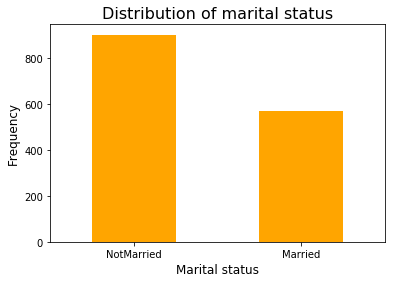

In [11]:
eddc_order['marital'].value_counts().plot(kind='bar', color='orange', rot=0)
plt.title('Distribution of marital status', fontsize=16)
plt.xlabel('Marital status', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

Text(0, 0.5, 'Frequency')

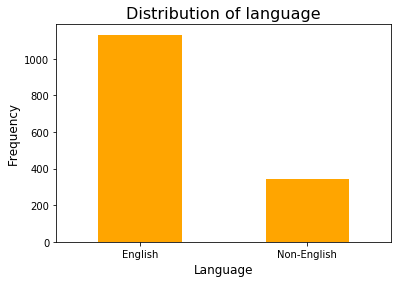

In [12]:
eddc_order['language'].value_counts().plot(kind='bar', color='orange', rot=0)
plt.title('Distribution of language', fontsize=16)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

Text(0, 0.5, 'Frequency')

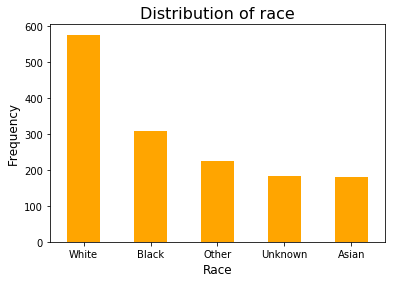

In [13]:
eddc_order['race'].value_counts().plot(kind='bar', color='orange', rot=0)
plt.title('Distribution of race', fontsize=16)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

Text(0, 0.5, 'Frequency')

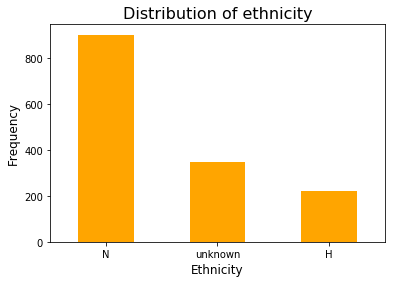

In [14]:
eddc_order['ethnicity'].value_counts().plot(kind='bar', color='orange', rot=0)
plt.title('Distribution of ethnicity', fontsize=16)
plt.xlabel('Ethnicity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

Text(0, 0.5, 'Frequency')

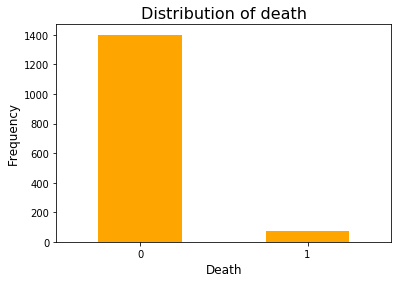

In [15]:
eddc_order['death'].value_counts().plot(kind='bar', color='orange', rot=0)
plt.title('Distribution of death', fontsize=16)
plt.xlabel('Death', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

Text(0, 0.5, 'Frequency')

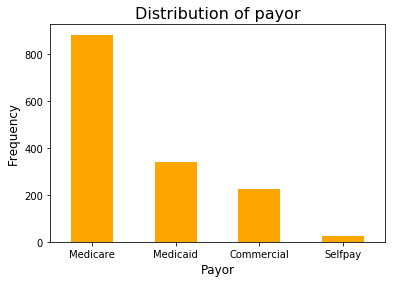

In [16]:
eddc_order['payor'].value_counts().plot(kind='bar', color='orange', rot=0)
plt.title('Distribution of payor', fontsize=16)
plt.xlabel('Payor', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

Text(0, 0.5, 'Frequency')

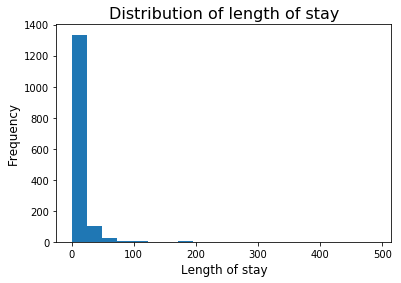

In [17]:
eddc_order['LOS'].plot(kind = 'hist', bins=20)
plt.title('Distribution of length of stay', fontsize=16)
plt.xlabel('Length of stay', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

Text(0.5, 1.0, 'Distribution of 30-day Readmission')

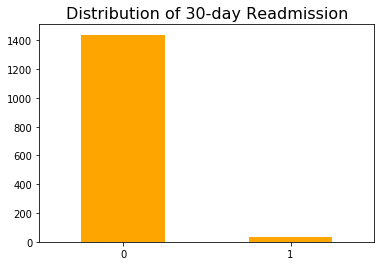

In [18]:
eddc_order['30day'].value_counts().plot(kind='bar', color='orange', rot=0)
plt.title('Distribution of 30-day Readmission', fontsize=16)

Text(0.5, 1.0, 'Distribution of 60-day Readmission')

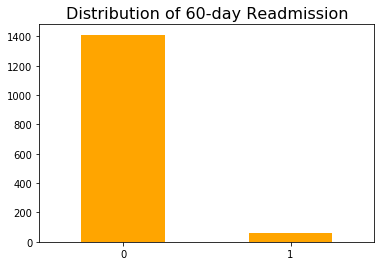

In [19]:
eddc_order['60day'].value_counts().plot(kind='bar', color='orange', rot=0)
plt.title('Distribution of 60-day Readmission', fontsize=16)

Text(0.5, 1.0, 'Distribution of 90-day Readmission')

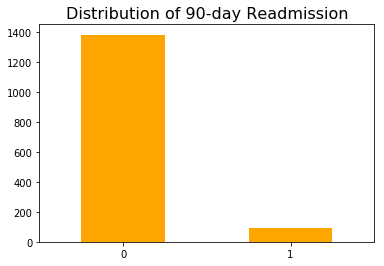

In [20]:
eddc_order['90ay'].value_counts().plot(kind='bar', color='orange', rot=0)
plt.title('Distribution of 90-day Readmission', fontsize=16)

Text(0.5, 1.0, 'Distribution of Charlson score')

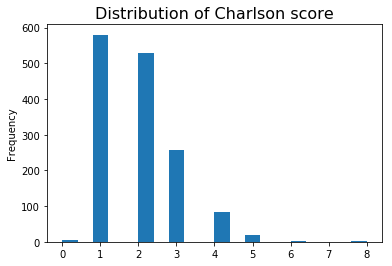

In [21]:
eddc_order['charlson'].plot(kind = 'hist', bins=20)
plt.title('Distribution of Charlson score', fontsize=16)

Text(0.5, 1.0, 'Distribution of Elixhauser score')

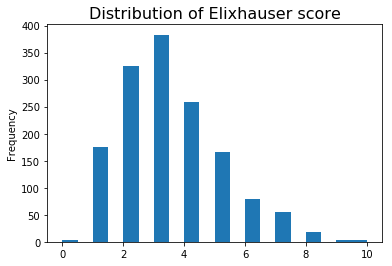

In [22]:
eddc_order['elixhauser'].plot(kind = 'hist', bins=20)
plt.title('Distribution of Elixhauser score', fontsize=16)

Text(0.5, 1.0, 'Distribution of care provider quartile')

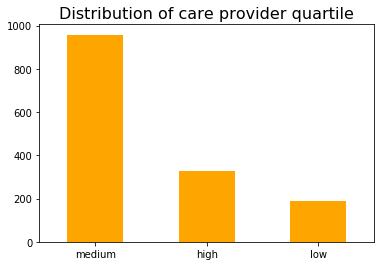

In [23]:
eddc_order['userQ'].value_counts().plot(kind='bar', color='orange', rot=0)
plt.title('Distribution of care provider quartile', fontsize=16)

Text(0.5, 1.0, 'Distribution of discharge disposition')

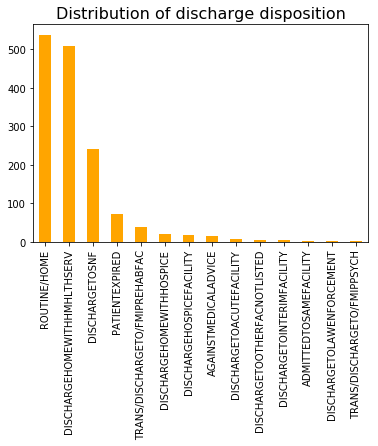

In [24]:
eddc_order['dischargedisposition'].value_counts().plot(kind='bar', color='orange', rot=90)
plt.title('Distribution of discharge disposition', fontsize=16)

In [25]:
eddc_order['dischargedisposition'].value_counts()

ROUTINE/HOME                      538
DISCHARGEHOMEWITHHMHLTHSERV       508
DISCHARGETOSNF                    240
PATIENTEXPIRED                     72
TRANS/DISCHARGETO/FMIPREHABFAC     37
DISCHARGEHOMEWITHHOSPICE           20
DISCHARGEHOSPICEFACILITY           17
AGAINSTMEDICALADVICE               14
DISCHARGETOACUTEFACILITY            8
DISCHARGETOOTHERFACNOTLISTED        4
DISCHARGETOINTERIMFACILITY          4
ADMITTEDTOSAMEFACILITY              2
DISCHARGETOLAWENFORCEMENT           2
TRANS/DISCHARGETO/FMIPPSYCH         2
Name: dischargedisposition, dtype: int64

Text(0.5, 1.0, 'Distribution of home')

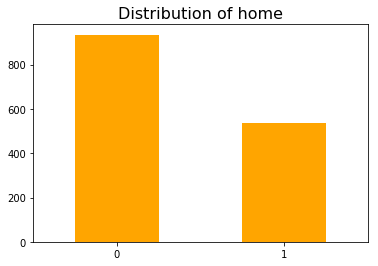

In [26]:
eddc_order['home'].value_counts().plot(kind='bar', color='orange', rot=0)
plt.title('Distribution of home', fontsize=16)

Text(0.5, 1.0, 'Distribution of campus')

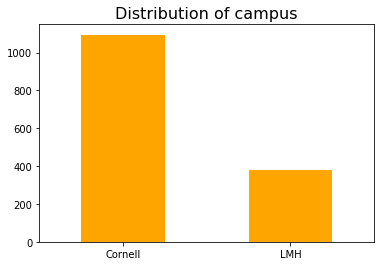

In [27]:
eddc_order['campus'].value_counts().plot(kind='bar', color='orange', rot=0)
plt.title('Distribution of campus', fontsize=16)

Text(0.5, 1.0, 'Distribution of ED decision')

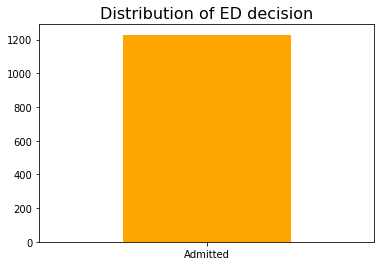

In [28]:
eddc_order['Eddecision'].value_counts().plot(kind='bar', color='orange', rot=0)
plt.title('Distribution of ED decision', fontsize=16)

Text(0.5, 1.0, 'Distribution of edcampus')

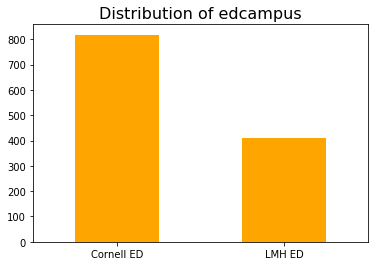

In [29]:
eddc_order['Edcampus'].value_counts().plot(kind='bar', color='orange', rot=0)
plt.title('Distribution of edcampus', fontsize=16)

Text(0.5, 1.0, 'Distribution of VTE')

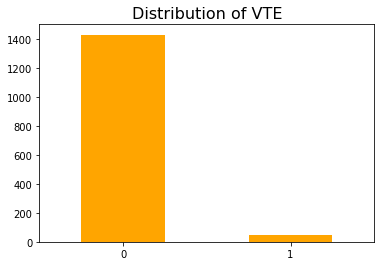

In [30]:
eddc_order['VTE'].value_counts().plot(kind='bar', color='orange', rot=0)
plt.title('Distribution of VTE', fontsize=16)

Text(0.5, 1.0, 'Distribution of CCW')

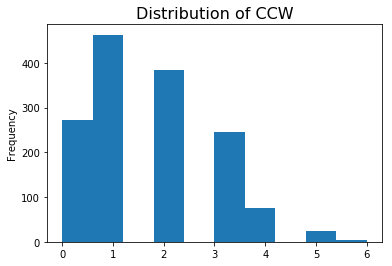

In [31]:
eddc_order['CCW'].plot(kind='hist', rot=0)
plt.title('Distribution of CCW', fontsize=16)

# Table 1: Total

In [32]:
eddc_order['LOS'].describe()

count    1473.000000
mean       11.252546
std        19.280750
min         0.000000
25%         4.000000
50%         7.000000
75%        13.000000
max       490.000000
Name: LOS, dtype: float64

In [33]:
print(eddc_order['30day'].value_counts())
print(eddc_order['30day'].value_counts()/n *100)

0    1439
1      34
Name: 30day, dtype: int64
0    97.691785
1     2.308215
Name: 30day, dtype: float64


In [34]:
print(eddc_order['60day'].value_counts())
print(eddc_order['60day'].value_counts()/n *100)

0    1412
1      61
Name: 60day, dtype: int64
0    95.858792
1     4.141208
Name: 60day, dtype: float64


In [35]:
print(eddc_order['90ay'].value_counts())
print(eddc_order['90ay'].value_counts()/n *100)

0    1384
1      89
Name: 90ay, dtype: int64
0    93.957909
1     6.042091
Name: 90ay, dtype: float64


In [36]:
eddc_order['charlson'].describe()

count    1473.000000
mean        1.933469
std         0.977839
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         8.000000
Name: charlson, dtype: float64

In [37]:
eddc_order['elixhauser'].describe()

count    1473.000000
mean        3.331976
std         1.674348
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: elixhauser, dtype: float64

In [38]:
print(eddc_order['userQ'].value_counts())
print(eddc_order['userQ'].value_counts()/n *100)

medium    958
high      327
low       188
Name: userQ, dtype: int64
medium    65.037339
high      22.199593
low       12.763069
Name: userQ, dtype: float64


In [39]:
eddc_order['dischargedisposition'].describe()

count             1468
unique              14
top       ROUTINE/HOME
freq               538
Name: dischargedisposition, dtype: object

In [40]:
n_discharge = eddc_order['dischargedisposition'].count()
n_discharge

1468

In [41]:
print(eddc_order['dischargedisposition'].value_counts())
print(eddc_order['dischargedisposition'].value_counts()/n_discharge * 100)  ## 99.99%

ROUTINE/HOME                      538
DISCHARGEHOMEWITHHMHLTHSERV       508
DISCHARGETOSNF                    240
PATIENTEXPIRED                     72
TRANS/DISCHARGETO/FMIPREHABFAC     37
DISCHARGEHOMEWITHHOSPICE           20
DISCHARGEHOSPICEFACILITY           17
AGAINSTMEDICALADVICE               14
DISCHARGETOACUTEFACILITY            8
DISCHARGETOOTHERFACNOTLISTED        4
DISCHARGETOINTERIMFACILITY          4
ADMITTEDTOSAMEFACILITY              2
DISCHARGETOLAWENFORCEMENT           2
TRANS/DISCHARGETO/FMIPPSYCH         2
Name: dischargedisposition, dtype: int64
ROUTINE/HOME                      36.648501
DISCHARGEHOMEWITHHMHLTHSERV       34.604905
DISCHARGETOSNF                    16.348774
PATIENTEXPIRED                     4.904632
TRANS/DISCHARGETO/FMIPREHABFAC     2.520436
DISCHARGEHOMEWITHHOSPICE           1.362398
DISCHARGEHOSPICEFACILITY           1.158038
AGAINSTMEDICALADVICE               0.953678
DISCHARGETOACUTEFACILITY           0.544959
DISCHARGETOOTHERFACNOTLISTED   

In [42]:
print(eddc_order['home'].value_counts())
print(eddc_order['home'].value_counts()/n*100)

0    935
1    538
Name: home, dtype: int64
0    63.4759
1    36.5241
Name: home, dtype: float64


In [43]:
print(eddc_order['campus'].value_counts())
print(eddc_order['campus'].value_counts()/n*100)

Cornell    1094
LMH         379
Name: campus, dtype: int64
Cornell    74.270197
LMH        25.729803
Name: campus, dtype: float64


In [44]:
print(eddc_order['Eddecision'].value_counts())
print(eddc_order['Eddecision'].value_counts()/n*100)

Admitted    1229
Name: Eddecision, dtype: int64
Admitted    83.435166
Name: Eddecision, dtype: float64


In [45]:
print(eddc_order['Edcampus'].value_counts())
print(eddc_order['Edcampus'].value_counts()/n*100)

Cornell ED    818
LMH ED        411
Name: Edcampus, dtype: int64
Cornell ED    55.532926
LMH ED        27.902240
Name: Edcampus, dtype: float64


In [46]:
print(eddc_order['VTE'].value_counts())
print(eddc_order['VTE'].value_counts()/n*100)

0    1428
1      45
Name: VTE, dtype: int64
0    96.94501
1     3.05499
Name: VTE, dtype: float64


In [47]:
eddc_order['CCW'].describe()

count    1473.000000
mean        1.649695
std         1.230622
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         6.000000
Name: CCW, dtype: float64

In [48]:
print(eddc_order['gender'].value_counts())
print(eddc_order['gender'].value_counts()/n*100)

Male      830
Female    643
Name: gender, dtype: int64
Male      56.34759
Female    43.65241
Name: gender, dtype: float64


In [49]:
print(eddc_order['marital'].value_counts())
print(eddc_order['marital'].value_counts()/n*100)

NotMarried    902
Married       571
Name: marital, dtype: int64
NotMarried    61.235574
Married       38.764426
Name: marital, dtype: float64


In [50]:
print(eddc_order['language'].value_counts())
print(eddc_order['language'].value_counts()/n*100)

English        1132
Non-English     341
Name: language, dtype: int64
English        76.849966
Non-English    23.150034
Name: language, dtype: float64


In [51]:
print(eddc_order['ethnicity'].value_counts())
print(eddc_order['ethnicity'].value_counts()/n*100)

N          903
unknown    348
H          222
Name: ethnicity, dtype: int64
N          61.303462
unknown    23.625255
H          15.071283
Name: ethnicity, dtype: float64


In [52]:
print(eddc_order['race'].value_counts())
print(eddc_order['race'].value_counts()/n*100)

White      577
Black      308
Other      224
Unknown    184
Asian      180
Name: race, dtype: int64
White      39.171758
Black      20.909708
Other      15.207060
Unknown    12.491514
Asian      12.219959
Name: race, dtype: float64


In [53]:
print(eddc_order['death'].value_counts())
print(eddc_order['death'].value_counts()/n*100)

0    1401
1      72
Name: death, dtype: int64
0    95.112016
1     4.887984
Name: death, dtype: float64


In [54]:
print(eddc_order['payor'].value_counts())
print(eddc_order['payor'].value_counts()/n*100)

Medicare      882
Medicaid      339
Commercial    226
Selfpay        26
Name: payor, dtype: int64
Medicare      59.877800
Medicaid      23.014257
Commercial    15.342838
Selfpay        1.765105
Name: payor, dtype: float64


# Table 1: by cluster

In [55]:
eddc_order['cluster_by30%'].value_counts()

2    680
1    399
4    301
3     93
Name: cluster_by30%, dtype: int64

In [56]:
n_cluster1 = eddc_order['cluster_by30%'].value_counts()[1]
n_cluster2 = eddc_order['cluster_by30%'].value_counts()[2]
n_cluster3 = eddc_order['cluster_by30%'].value_counts()[3]
n_cluster4 = eddc_order['cluster_by30%'].value_counts()[4]
print(n_cluster1)
print(n_cluster2)
print(n_cluster3)
print(n_cluster4)

399
680
93
301


In [57]:
eddc_order.groupby(['cluster_by30%'])['LOS'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster_by30%,,,,,,,,
1,399.0,12.486216,8.860118,1.0,7.0,10.0,17.0,69.0
2,680.0,5.869118,8.601927,0.0,2.0,4.0,7.0,191.0
3,93.0,41.344086,57.812007,6.0,18.0,26.0,43.0,490.0
4,301.0,12.481728,13.324307,0.0,4.0,7.0,15.0,106.0


In [58]:
print(eddc_order.groupby(['cluster_by30%'])['30day'].value_counts())
print(eddc_order.groupby(['cluster_by30%'])['30day'].value_counts()[1]/n_cluster1*100)
print(eddc_order.groupby(['cluster_by30%'])['30day'].value_counts()[2]/n_cluster2*100)
print(eddc_order.groupby(['cluster_by30%'])['30day'].value_counts()[3]/n_cluster3*100)
print(eddc_order.groupby(['cluster_by30%'])['30day'].value_counts()[4]/n_cluster4*100)

cluster_by30%  30day
1              0        390
               1          9
2              0        662
               1         18
3              0         90
               1          3
4              0        297
               1          4
Name: 30day, dtype: int64
30day
0    97.744361
1     2.255639
Name: 30day, dtype: float64
30day
0    97.352941
1     2.647059
Name: 30day, dtype: float64
30day
0    96.774194
1     3.225806
Name: 30day, dtype: float64
30day
0    98.671096
1     1.328904
Name: 30day, dtype: float64


In [59]:
print(eddc_order.groupby(['cluster_by30%'])['60day'].value_counts())
print(eddc_order.groupby(['cluster_by30%'])['60day'].value_counts()[1]/n_cluster1*100)
print(eddc_order.groupby(['cluster_by30%'])['60day'].value_counts()[2]/n_cluster2*100)
print(eddc_order.groupby(['cluster_by30%'])['60day'].value_counts()[3]/n_cluster3*100)
print(eddc_order.groupby(['cluster_by30%'])['60day'].value_counts()[4]/n_cluster4*100)

cluster_by30%  60day
1              0        378
               1         21
2              0        652
               1         28
3              0         89
               1          4
4              0        293
               1          8
Name: 60day, dtype: int64
60day
0    94.736842
1     5.263158
Name: 60day, dtype: float64
60day
0    95.882353
1     4.117647
Name: 60day, dtype: float64
60day
0    95.698925
1     4.301075
Name: 60day, dtype: float64
60day
0    97.342193
1     2.657807
Name: 60day, dtype: float64


In [60]:
print(eddc_order.groupby(['cluster_by30%'])['90ay'].value_counts())
print(eddc_order.groupby(['cluster_by30%'])['90ay'].value_counts()[1]/n_cluster1*100)
print(eddc_order.groupby(['cluster_by30%'])['90ay'].value_counts()[2]/n_cluster2*100)
print(eddc_order.groupby(['cluster_by30%'])['90ay'].value_counts()[3]/n_cluster3*100)
print(eddc_order.groupby(['cluster_by30%'])['90ay'].value_counts()[4]/n_cluster4*100)

cluster_by30%  90ay
1              0       366
               1        33
2              0       638
               1        42
3              0        89
               1         4
4              0       291
               1        10
Name: 90ay, dtype: int64
90ay
0    91.729323
1     8.270677
Name: 90ay, dtype: float64
90ay
0    93.823529
1     6.176471
Name: 90ay, dtype: float64
90ay
0    95.698925
1     4.301075
Name: 90ay, dtype: float64
90ay
0    96.677741
1     3.322259
Name: 90ay, dtype: float64


In [61]:
eddc_order.groupby(['cluster_by30%'])['charlson'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster_by30%,,,,,,,,
1,399.0,2.022556,1.018420,1.0,1.0,2.0,3.0,8.0
2,680.0,1.830882,0.931807,0.0,1.0,2.0,2.0,5.0
3,93.0,2.268817,1.199092,1.0,1.0,2.0,3.0,5.0
4,301.0,1.943522,0.916588,0.0,1.0,2.0,3.0,5.0


In [62]:
eddc_order.groupby(['cluster_by30%'])['elixhauser'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster_by30%,,,,,,,,
1,399.0,3.476190,1.665134,1.0,2.0,3.0,4.0,9.0
2,680.0,3.064706,1.547078,0.0,2.0,3.0,4.0,9.0
3,93.0,4.569892,1.924656,1.0,3.0,5.0,6.0,10.0
4,301.0,3.362126,1.690688,0.0,2.0,3.0,4.0,10.0


In [63]:
print(eddc_order.groupby(['cluster_by30%'])['userQ'].value_counts())
print(eddc_order.groupby(['cluster_by30%'])['userQ'].value_counts()[1]/n_cluster1*100)
print(eddc_order.groupby(['cluster_by30%'])['userQ'].value_counts()[2]/n_cluster2*100) ## 110.01%
print(eddc_order.groupby(['cluster_by30%'])['userQ'].value_counts()[3]/n_cluster3*100)
print(eddc_order.groupby(['cluster_by30%'])['userQ'].value_counts()[4]/n_cluster4*100) ## 110.01%

cluster_by30%  userQ 
1              medium    246
               high       92
               low        61
2              medium    358
               high      219
               low       103
3              medium     81
               low        11
               high        1
4              medium    273
               high       15
               low        13
Name: userQ, dtype: int64
userQ
medium    61.654135
high      23.057644
low       15.288221
Name: userQ, dtype: float64
userQ
medium    52.647059
high      32.205882
low       15.147059
Name: userQ, dtype: float64
userQ
medium    87.096774
low       11.827957
high       1.075269
Name: userQ, dtype: float64
userQ
medium    90.697674
high       4.983389
low        4.318937
Name: userQ, dtype: float64


In [64]:
print(eddc_order.groupby(['cluster_by30%'])['dischargedisposition'].value_counts())
print(eddc_order.groupby(['cluster_by30%'])['dischargedisposition'].value_counts()[1]/n_cluster1*100)
print(eddc_order.groupby(['cluster_by30%'])['dischargedisposition'].value_counts()[2]/676*100) ## not number of cluster2(680), 100.02%
print(eddc_order.groupby(['cluster_by30%'])['dischargedisposition'].value_counts()[3]/n_cluster3*100)
print(eddc_order.groupby(['cluster_by30%'])['dischargedisposition'].value_counts()[4]/300*100) ## not number of cluster4(301), 99.99%

cluster_by30%  dischargedisposition          
1              DISCHARGEHOMEWITHHMHLTHSERV       160
               ROUTINE/HOME                       99
               DISCHARGETOSNF                     81
               PATIENTEXPIRED                     21
               TRANS/DISCHARGETO/FMIPREHABFAC     14
               DISCHARGEHOMEWITHHOSPICE           12
               DISCHARGEHOSPICEFACILITY            8
               AGAINSTMEDICALADVICE                1
               DISCHARGETOACUTEFACILITY            1
               DISCHARGETOINTERIMFACILITY          1
               DISCHARGETOOTHERFACNOTLISTED        1
2              ROUTINE/HOME                      306
               DISCHARGEHOMEWITHHMHLTHSERV       223
               DISCHARGETOSNF                     92
               PATIENTEXPIRED                     15
               TRANS/DISCHARGETO/FMIPREHABFAC     12
               AGAINSTMEDICALADVICE                9
               DISCHARGEHOMEWITHHOSPICE            5


In [65]:
print(eddc_order.groupby(['cluster_by30%'])['home'].value_counts())
print(eddc_order.groupby(['cluster_by30%'])['home'].value_counts()[1]/n_cluster1*100)
print(eddc_order.groupby(['cluster_by30%'])['home'].value_counts()[2]/n_cluster2*100) 
print(eddc_order.groupby(['cluster_by30%'])['home'].value_counts()[3]/n_cluster3*100)
print(eddc_order.groupby(['cluster_by30%'])['home'].value_counts()[4]/n_cluster4*100) 

cluster_by30%  home
1              0       300
               1        99
2              0       374
               1       306
3              0        87
               1         6
4              0       174
               1       127
Name: home, dtype: int64
home
0    75.18797
1    24.81203
Name: home, dtype: float64
home
0    55.0
1    45.0
Name: home, dtype: float64
home
0    93.548387
1     6.451613
Name: home, dtype: float64
home
0    57.807309
1    42.192691
Name: home, dtype: float64


In [66]:
print(eddc_order.groupby(['cluster_by30%'])['campus'].value_counts())
print(eddc_order.groupby(['cluster_by30%'])['campus'].value_counts()[1]/n_cluster1*100)
print(eddc_order.groupby(['cluster_by30%'])['campus'].value_counts()[2]/n_cluster2*100) 
print(eddc_order.groupby(['cluster_by30%'])['campus'].value_counts()[3]/n_cluster3*100)
print(eddc_order.groupby(['cluster_by30%'])['campus'].value_counts()[4]/n_cluster4*100)

cluster_by30%  campus 
1              Cornell    341
               LMH         58
2              Cornell    470
               LMH        210
3              Cornell     86
               LMH          7
4              Cornell    197
               LMH        104
Name: campus, dtype: int64
campus
Cornell    85.463659
LMH        14.536341
Name: campus, dtype: float64
campus
Cornell    69.117647
LMH        30.882353
Name: campus, dtype: float64
campus
Cornell    92.473118
LMH         7.526882
Name: campus, dtype: float64
campus
Cornell    65.448505
LMH        34.551495
Name: campus, dtype: float64


In [67]:
print(eddc_order.groupby(['cluster_by30%'])['Eddecision'].value_counts())
print(eddc_order.groupby(['cluster_by30%'])['Eddecision'].value_counts()[1]/n_cluster1*100)
print(eddc_order.groupby(['cluster_by30%'])['Eddecision'].value_counts()[2]/n_cluster2*100) 
print(eddc_order.groupby(['cluster_by30%'])['Eddecision'].value_counts()[3]/n_cluster3*100)
print(eddc_order.groupby(['cluster_by30%'])['Eddecision'].value_counts()[4]/n_cluster4*100)

cluster_by30%  Eddecision
1              Admitted      332
2              Admitted      591
3              Admitted       65
4              Admitted      241
Name: Eddecision, dtype: int64
Eddecision
Admitted    83.20802
Name: Eddecision, dtype: float64
Eddecision
Admitted    86.911765
Name: Eddecision, dtype: float64
Eddecision
Admitted    69.892473
Name: Eddecision, dtype: float64
Eddecision
Admitted    80.066445
Name: Eddecision, dtype: float64


In [68]:
print(eddc_order.groupby(['cluster_by30%'])['VTE'].value_counts())
print(eddc_order.groupby(['cluster_by30%'])['VTE'].value_counts()[1]/n_cluster1*100)
print(eddc_order.groupby(['cluster_by30%'])['VTE'].value_counts()[2]/n_cluster2*100) 
print(eddc_order.groupby(['cluster_by30%'])['VTE'].value_counts()[3]/n_cluster3*100)
print(eddc_order.groupby(['cluster_by30%'])['VTE'].value_counts()[4]/n_cluster4*100)

cluster_by30%  VTE
1              0      390
               1        9
2              0      672
               1        8
3              0       79
               1       14
4              0      287
               1       14
Name: VTE, dtype: int64
VTE
0    97.744361
1     2.255639
Name: VTE, dtype: float64
VTE
0    98.823529
1     1.176471
Name: VTE, dtype: float64
VTE
0    84.946237
1    15.053763
Name: VTE, dtype: float64
VTE
0    95.348837
1     4.651163
Name: VTE, dtype: float64


In [69]:
eddc_order.groupby(['cluster_by30%'])['CCW'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster_by30%,,,,,,,,
1,399.0,1.724311,1.225436,0.0,1.0,2.0,3.0,6.0
2,680.0,1.520588,1.198742,0.0,1.0,1.0,2.0,6.0
3,93.0,2.129032,1.320621,0.0,1.0,2.0,3.0,6.0
4,301.0,1.694352,1.238117,0.0,1.0,2.0,2.0,6.0


In [70]:
print(eddc_order.groupby(['cluster_by30%'])['gender'].value_counts())
print(eddc_order.groupby(['cluster_by30%'])['gender'].value_counts()[1]/n_cluster1*100)
print(eddc_order.groupby(['cluster_by30%'])['gender'].value_counts()[2]/n_cluster2*100) 
print(eddc_order.groupby(['cluster_by30%'])['gender'].value_counts()[3]/n_cluster3*100)
print(eddc_order.groupby(['cluster_by30%'])['gender'].value_counts()[4]/n_cluster4*100)

cluster_by30%  gender
1              Male      214
               Female    185
2              Male      383
               Female    297
3              Male       56
               Female     37
4              Male      177
               Female    124
Name: gender, dtype: int64
gender
Male      53.634085
Female    46.365915
Name: gender, dtype: float64
gender
Male      56.323529
Female    43.676471
Name: gender, dtype: float64
gender
Male      60.215054
Female    39.784946
Name: gender, dtype: float64
gender
Male      58.803987
Female    41.196013
Name: gender, dtype: float64


In [71]:
print(eddc_order.groupby(['cluster_by30%'])['marital'].value_counts())
print(eddc_order.groupby(['cluster_by30%'])['marital'].value_counts()[1]/n_cluster1*100)
print(eddc_order.groupby(['cluster_by30%'])['marital'].value_counts()[2]/n_cluster2*100) 
print(eddc_order.groupby(['cluster_by30%'])['marital'].value_counts()[3]/n_cluster3*100)
print(eddc_order.groupby(['cluster_by30%'])['marital'].value_counts()[4]/n_cluster4*100)

cluster_by30%  marital   
1              NotMarried    226
               Married       173
2              NotMarried    444
               Married       236
3              Married        49
               NotMarried     44
4              NotMarried    188
               Married       113
Name: marital, dtype: int64
marital
NotMarried    56.641604
Married       43.358396
Name: marital, dtype: float64
marital
NotMarried    65.294118
Married       34.705882
Name: marital, dtype: float64
marital
Married       52.688172
NotMarried    47.311828
Name: marital, dtype: float64
marital
NotMarried    62.458472
Married       37.541528
Name: marital, dtype: float64


In [72]:
print(eddc_order.groupby(['cluster_by30%'])['language'].value_counts())
print(eddc_order.groupby(['cluster_by30%'])['language'].value_counts()[1]/n_cluster1*100)
print(eddc_order.groupby(['cluster_by30%'])['language'].value_counts()[2]/n_cluster2*100) 
print(eddc_order.groupby(['cluster_by30%'])['language'].value_counts()[3]/n_cluster3*100)
print(eddc_order.groupby(['cluster_by30%'])['language'].value_counts()[4]/n_cluster4*100)

cluster_by30%  language   
1              English        304
               Non-English     95
2              English        544
               Non-English    136
3              English         78
               Non-English     15
4              English        206
               Non-English     95
Name: language, dtype: int64
language
English        76.190476
Non-English    23.809524
Name: language, dtype: float64
language
English        80.0
Non-English    20.0
Name: language, dtype: float64
language
English        83.870968
Non-English    16.129032
Name: language, dtype: float64
language
English        68.438538
Non-English    31.561462
Name: language, dtype: float64


In [73]:
print(eddc_order.groupby(['cluster_by30%'])['ethnicity'].value_counts())
print(eddc_order.groupby(['cluster_by30%'])['ethnicity'].value_counts()[1]/n_cluster1*100)
print(eddc_order.groupby(['cluster_by30%'])['ethnicity'].value_counts()[2]/n_cluster2*100)  ## 100.01% 
print(eddc_order.groupby(['cluster_by30%'])['ethnicity'].value_counts()[3]/n_cluster3*100)  ## 99.99%
print(eddc_order.groupby(['cluster_by30%'])['ethnicity'].value_counts()[4]/n_cluster4*100)

cluster_by30%  ethnicity
1              N            230
               unknown      107
               H             62
2              N            440
               unknown      133
               H            107
3              N             54
               unknown       25
               H             14
4              N            179
               unknown       83
               H             39
Name: ethnicity, dtype: int64
ethnicity
N          57.644110
unknown    26.817043
H          15.538847
Name: ethnicity, dtype: float64
ethnicity
N          64.705882
unknown    19.558824
H          15.735294
Name: ethnicity, dtype: float64
ethnicity
N          58.064516
unknown    26.881720
H          15.053763
Name: ethnicity, dtype: float64
ethnicity
N          59.468439
unknown    27.574751
H          12.956811
Name: ethnicity, dtype: float64


In [74]:
print(eddc_order.groupby(['cluster_by30%'])['race'].value_counts())
print(eddc_order.groupby(['cluster_by30%'])['race'].value_counts()[1]/n_cluster1*100)
print(eddc_order.groupby(['cluster_by30%'])['race'].value_counts()[2]/n_cluster2*100) 
print(eddc_order.groupby(['cluster_by30%'])['race'].value_counts()[3]/n_cluster3*100)
print(eddc_order.groupby(['cluster_by30%'])['race'].value_counts()[4]/n_cluster4*100)

cluster_by30%  race   
1              White      171
               Other       75
               Black       64
               Unknown     52
               Asian       37
2              White      279
               Black      150
               Other       97
               Unknown     78
               Asian       76
3              White       44
               Black       17
               Unknown     17
               Other       11
               Asian        4
4              White       83
               Black       77
               Asian       63
               Other       41
               Unknown     37
Name: race, dtype: int64
race
White      42.857143
Other      18.796992
Black      16.040100
Unknown    13.032581
Asian       9.273183
Name: race, dtype: float64
race
White      41.029412
Black      22.058824
Other      14.264706
Unknown    11.470588
Asian      11.176471
Name: race, dtype: float64
race
White      47.311828
Black      18.279570
Unknown    18.279570
Other     

In [75]:
print(eddc_order.groupby(['cluster_by30%'])['death'].value_counts())
print(eddc_order.groupby(['cluster_by30%'])['death'].value_counts()[1]/n_cluster1*100)
print(eddc_order.groupby(['cluster_by30%'])['death'].value_counts()[2]/n_cluster2*100) 
print(eddc_order.groupby(['cluster_by30%'])['death'].value_counts()[3]/n_cluster3*100)
print(eddc_order.groupby(['cluster_by30%'])['death'].value_counts()[4]/n_cluster4*100)

cluster_by30%  death
1              0        378
               1         21
2              0        665
               1         15
3              0         77
               1         16
4              0        281
               1         20
Name: death, dtype: int64
death
0    94.736842
1     5.263158
Name: death, dtype: float64
death
0    97.794118
1     2.205882
Name: death, dtype: float64
death
0    82.795699
1    17.204301
Name: death, dtype: float64
death
0    93.355482
1     6.644518
Name: death, dtype: float64


In [76]:
print(eddc_order.groupby(['cluster_by30%'])['payor'].value_counts())
print(eddc_order.groupby(['cluster_by30%'])['payor'].value_counts()[1]/n_cluster1*100)
print(eddc_order.groupby(['cluster_by30%'])['payor'].value_counts()[2]/n_cluster2*100) ## 100.01%
print(eddc_order.groupby(['cluster_by30%'])['payor'].value_counts()[3]/n_cluster3*100)
print(eddc_order.groupby(['cluster_by30%'])['payor'].value_counts()[4]/n_cluster4*100)

cluster_by30%  payor     
1              Medicare      249
               Medicaid       90
               Commercial     53
               Selfpay         7
2              Medicare      423
               Medicaid      146
               Commercial    100
               Selfpay        11
3              Medicare       57
               Commercial     18
               Medicaid       17
               Selfpay         1
4              Medicare      153
               Medicaid       86
               Commercial     55
               Selfpay         7
Name: payor, dtype: int64
payor
Medicare      62.406015
Medicaid      22.556391
Commercial    13.283208
Selfpay        1.754386
Name: payor, dtype: float64
payor
Medicare      62.205882
Medicaid      21.470588
Commercial    14.705882
Selfpay        1.617647
Name: payor, dtype: float64
payor
Medicare      61.290323
Commercial    19.354839
Medicaid      18.279570
Selfpay        1.075269
Name: payor, dtype: float64
payor
Medicare      50.830565


# Table 1: P value

In [77]:
## normal distribution test
continuous = ['LOS', 'charlson', 'elixhauser', 'CCW']
pvalues = {}
for i in continuous:
    pvalues[i] = normaltest(eddc_order[i])[1]
print(pvalues) # P<0.05, not normal distribution

{'LOS': 0.0, 'charlson': 1.5331882360576835e-50, 'elixhauser': 8.313619217510059e-27, 'CCW': 9.177575776227363e-17}


In [78]:
x_name = ['LOS', '30day', '60day', '90ay', 'charlson', 'elixhauser', 'userQ', 'dischargedisposition', 'home', 'campus', 'Eddecision', 'Edcampus', 'VTE', 'CCW', 'gender', 'marital', 'language', 'ethnicity', 'race', 'death', 'payor']
categorical = ['30day', '60day', '90ay', 'userQ', 'dischargedisposition', 'home', 'campus', 'Eddecision', 'Edcampus', 'VTE', 'gender', 'marital', 'language', 'ethnicity', 'race', 'death', 'payor']
groupby = ['cluster_by30%']
nonnormal = ['LOS', 'charlson', 'elixhauser', 'CCW']

In [79]:
mytable = TableOne(eddc_order, x_name, categorical, groupby, nonnormal, pval = True)
print(mytable.tabulate(tablefmt = "github"))
mytable.to_excel('/Users/fan/Desktop/Fullhouse/WCM/HospitalManagement/Table_1.xlsx')

/anaconda3/lib/python3.7/site-packages/tableone.py:752: UserWarning: Chi-squared test for {} may be invalid (expected cell counts are < 5).
  "(expected cell counts are < 5).".format(v))


|                      |                                | Missing   | 1               | 2             | 3                | 4              | P-Value   | Test                                      |
|----------------------|--------------------------------|-----------|-----------------|---------------|------------------|----------------|-----------|-------------------------------------------|
| n                    |                                |           | 399             | 680           | 93               | 301            |           |                                           |
| LOS                  |                                | 0         | 10.0 [7.0,17.0] | 4.0 [2.0,7.0] | 26.0 [18.0,43.0] | 7.0 [4.0,15.0] | <0.001    | Kruskal-Wallis                            |
| 30day                | 0                              | 0         | 390 (97.7)      | 662 (97.4)    | 90 (96.8)        | 297 (98.7)     | 0.577     | Chi-squared (warning: expected count < 5) |
|                   

Normal distribution has been tested so that one-way ANOVA cann't be used
Kruskal-Wallis or chi-squared test: 

In [80]:
eddc_order_1 = eddc_order[eddc_order['cluster_by30%']==1]
eddc_order_2 = eddc_order[eddc_order['cluster_by30%']==2]
eddc_order_3 = eddc_order[eddc_order['cluster_by30%']==3]
eddc_order_4 = eddc_order[eddc_order['cluster_by30%']==4]

In [82]:
#f,p = stats.f_oneway(eddc_order_1['LOS'], eddc_order_2['LOS'], eddc_order_3['LOS'], eddc_order_4['LOS'])
#print(f,p)

In [83]:
#f,p = stats.f_oneway(eddc_order_1['charlson'], eddc_order_2['charlson'], eddc_order_3['charlson'], eddc_order_4['charlson'])
#print(f,p)

7.349256660984074 6.871493656130703e-05


In [84]:
#f,p = stats.f_oneway(eddc_order_1['elixhauser'], eddc_order_2['elixhauser'], eddc_order_3['elixhauser'], eddc_order_4['elixhauser'])
#print(f,p)

24.896467265898224 1.0326726675164726e-15


In [85]:
#f,p = stats.f_oneway(eddc_order_1['CCW'], eddc_order_2['CCW'], eddc_order_3['CCW'], eddc_order_4['CCW'])
#print(f,p)

7.929512917980649 3.018722478942286e-05


In [86]:
for i in nonnormal:
    kwresult = scipy.stats.kruskal(eddc_order_1[i], eddc_order_2[i], eddc_order_3[i], eddc_order_4[i]) 
    print(i)
    print(kwresult)

LOS
KruskalResult(statistic=434.41709215093374, pvalue=7.752054536367961e-94)
charlson
KruskalResult(statistic=18.189286941732288, pvalue=0.00040202739087321976)
elixhauser
KruskalResult(statistic=60.73125519012608, pvalue=4.102078611464514e-13)
CCW
KruskalResult(statistic=23.272400209642132, pvalue=3.5432992870826796e-05)


In [87]:
for i in categorical: 
    print(i)
    cross_table = pd.crosstab(eddc_order[i], eddc_order['cluster_by30%'], margins=True)
    print('chisq = %6.4f\n p-value = %6.4f\n dof = %i\n expected_freq = %s' %stats.chi2_contingency(cross_table))

30day
chisq = 1.9786
 p-value = 0.9817
 dof = 8
 expected_freq = [[ 389.79022403  664.30414121   90.85336049  294.05227427 1439.        ]
 [   9.20977597   15.69585879    2.14663951    6.94772573   34.        ]
 [ 399.          680.           93.          301.         1473.        ]]
60day
chisq = 2.9406
 p-value = 0.9380
 dof = 8
 expected_freq = [[ 382.47657841  651.83978276   89.14867617  288.53496266 1412.        ]
 [  16.52342159   28.16021724    3.85132383   12.46503734   61.        ]
 [ 399.          680.           93.          301.         1473.        ]]
90ay
chisq = 7.9311
 p-value = 0.4402
 dof = 8
 expected_freq = [[ 374.89205703  638.9137814    87.3808554   282.81330618 1384.        ]
 [  24.10794297   41.0862186     5.6191446    18.18669382   89.        ]
 [ 399.          680.           93.          301.         1473.        ]]
userQ
chisq = 165.7710
 p-value = 0.0000
 dof = 12
 expected_freq = [[  88.57637475  150.95723014   20.64562118   66.82077393  327.        ]
 [  5